# Quantum Transport: Atom to Transistor by Supriyo Datta 

***

### How to navigate through this code

<font color = "olive"> <u> 
- In each example, previous variables were killed and a fresh start was conducted.
- Topic and figure numbers are kept same as in the book for reference.    </u> </font>

***

# Table of Contents
11. <font size="3.5">[Supplementary notes: phonons](#eleventh-chapter)<br></font>
    11.2. [Physics of Ohm’s law](#11.2)<br>
    11.3. [Where is the heat dissipated?](#11.3)<br>
    11.4. [Where is the voltage drop?](#11.4)<br>
    11.E. [Exercises](#11.E)<br>
[_References_](#references)<br>

***

# 11. Atom to transistor <a id="eleventh-chapter"></a>

## <font color = "navy" >11.2 Physics of Ohm’s law </font> <a id="11.2"></a>

In [197]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [198]:
#1-D with elastic phase-breaking and/or coherent, T vs. E, fixed length
#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=1*9.1e-31; IE=(q*q)/(2*pi*hbar); kT=0.025;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q); D=0.01*0;

#Energy grid
NE=401; E=linspace(0.1,0.3,NE); zplus=1j*1e-12; dE=E[1]-E[0];

#Bias
V=0.01; f1=1/(1+exp((-V/2)/kT)); f2=1/(1+exp((V/2)/kT));
    
#Hamiltonian
Np=40; UB=zeros((Np,1)); UB[4]=0.5*1; UB[35]=0.5*1;
U1=V*transpose(linspace(0.5,-0.5,Np)); XX=a*linspace(0,Np-1,Np);
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));

#Initializing arrays
I1=zeros((NE)); I2=zeros((NE));

#Iterative solution
for k in range(0,NE):
    sig1=matrix(zeros((Np,Np),dtype=complex)); sig2=matrix(zeros((Np,Np),dtype=complex));
    ck=1-((E[k]+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
    sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1)));
    ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
    
    #calculating the Green function, G self-consistently
    G=inv((E[k]+zplus)*eye(Np)-T-diag(diag(U1+UB))-sig1-sig2); change=1;
    while change>1e-4:
        sigp=diag(D*diag(G));
        S=inv(((E[k]+zplus)*eye(Np))-T-diag(diag(U1+UB))-sig1-sig2-sigp);
        change=sum(sum(abs(G-S)))/(sum(sum(abs(G)+abs(S))));
        G=(0.5*G)+(0.5*S);
            
    G=S; A=1j*(G-conj(transpose(G)));
    M=D*(G*conj(G));
    #calculating the electron density,n(r;E)
    gamp=1j*(sigp-conj(transpose(sigp))); gamma=gam1+gam2+gamp;
    sigin1=f1*gam1; sigin2=f2*gam2;
    n=(inv(eye(Np)-M))*diag(diag(G*(sigin1+sigin2)*conj(transpose(G))));
    siginp=D*diag(n);
    #calculating the correlation function Gn
    Gn=G*(sigin1+sigin2+siginp)*conj(transpose(G));
    #calculating the effective transmission
    I1[k]=(1/(f2-f1))*real(trace(gam1*Gn)-trace(sigin1*A));
    I2[k]=(1/(f1-f2))*real(trace(gam2*Gn)-trace(sigin2*A));

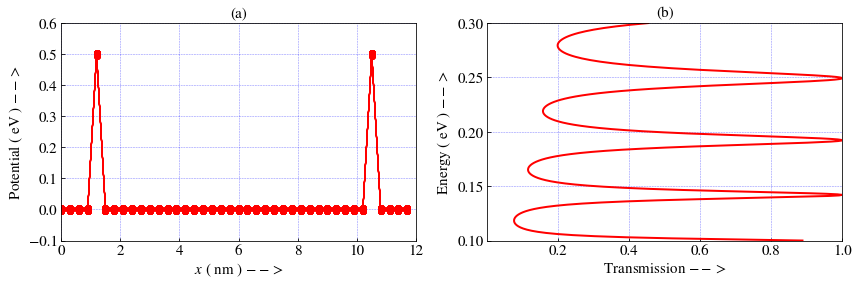

In [199]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(1e9*XX,U1+UB,'r',lw=1)
plot(1e9*XX,U1+UB,'ro',lw=1)
xlabel(' $x$ ( nm ) $-->$ ',fontsize=15)
ylabel(' Potential ( eV ) $-->$ ',fontsize=15)
xlim(0,12)
ylim(-0.1,0.6)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('(a)',fontsize=15)
grid(color='b', alpha=0.5, ls='--', lw=0.5)

subplot(1,2,2)
plot(I1,E,'r',lw=2)
xlabel(' Transmission $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,1)
ylim(0.1,0.3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
xticks(arange(0.2,1.2,0.2))
title('(b)',fontsize=15)
grid(color='b', alpha=0.5, ls='--', lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 11.2.2__ (a) A short device with two scatterers, A and B. A discrete lattice with 40 sites separated by $a$ = 3$\mathring{A}$ was used in the calculation along with an effective mass equal to the free electron mass $m$. A small bias potential was assumed varying linearly from +5 meV to –5 meV across the device. Each scatterer is represented by a potential of 0.5 eV at one lattice site.<br> (b) Transmission versus energy calculated with only one scatterer (A or B) and with both scatterers
(A and B). </font>

***

In [200]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [201]:
#multi-moded coherent transport,T vs. E

#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=9.1e-31; IE=(q*q)/(2*pi*hbar); kT=0.025;

#inputs
a=5e-10; t0=(hbar**2)/(2*m*(a**2)*q);

#Energy grid
NE=11;
E=linspace(0.1,0.3,NE); zplus=1j*1e-12; dE=E[1]-E[0];

#Bias
V=0.01; f1=1/(1+exp((-V/2)/kT)); f2=1/(1+exp((V/2)/kT));

#Transverse modes
NW=15; NT=7;
alpha=(4*t0*diag(ones((NW))))-(t0*diag(ones((NW-1)),1))-(t0*diag(ones((NW-1)),-1));
[D,VT]=eigh(alpha); D=sort(D);
xin=list(range(0,NT));
VT=VT[:,xin]; D=diag(dot(dot(transpose(VT),alpha),VT));

#Hamiltonian
Np=40; UB=zeros((Np,1)); UB[4]=0.25*1; UB[35]=0.25*0;
impshape=hstack((linspace(0,1,7), linspace(1,0,NW-7)));
U1=V*transpose(linspace(0.5,-0.5,Np));
al=alpha+(U1[0]*eye(NW,NW));
H=dot(dot(transpose(VT),al),VT); H1=H;
Z=zeros((NT,NT)); bet=-t0*eye(NT,NT);

for N in range(1,Np):
    al=alpha+(U1[N]*eye(NW,NW)); al1=al;
    al=al+(diag(UB[N]*impshape));
    al=dot(dot(transpose(VT),al),VT); H=vstack((hstack((H,bet)),hstack((transpose(bet),al))))
    al1=dot(dot(transpose(VT),al1),VT); H1=vstack((hstack((H1,bet)),hstack((transpose(bet),al1)))) #Use for one scatterer
    bet=vstack((Z,bet));

#Initializing arrays
ka=zeros((7),dtype=complex); T=zeros((NE)); M=zeros((NE)); 

#calculating the transmission
for k in range(0,NE):
    ck=(D-E[k]-zplus+U1[0])/(2*t0);
    for x in range(0,7):
        ka[x]=cmath.acos(ck[x]); 
    s1=-t0*exp(1j*ka); sig1=vstack((hstack((diag(s1),zeros((NT,NT*(Np-1))))),zeros((NT*(Np-1),NT*Np))));
    ck=(D-E[k]-zplus+U1[Np-1])/(2*t0); 
    for x in range(0,7):
        ka[x]=cmath.acos(ck[x]);
    s2=-t0*exp(1j*ka); sig2=vstack((zeros((NT*(Np-1),NT*Np)),hstack((zeros((NT,NT*(Np-1))),diag(s2))))); 
    gam1=1j*(sig1-conj(transpose(sig1))); gam2=1j*(sig2-conj(transpose(sig2)));
    G=inv(((E[k]+zplus)*eye(NT*Np))-H-sig1-sig2);
    T[k]=real(trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G)))));
    G1=inv(((E[k]+zplus)*eye(NT*Np))-H1-sig1-sig2); #Use for one scatterer
    M[k]=real(trace(dot(dot(dot(gam1,G1),gam2),conj(transpose(G1))))); #use for one scatterer
    
Tsc=T/(2-(T/M)); #semiclassical addition, use for one scatterer

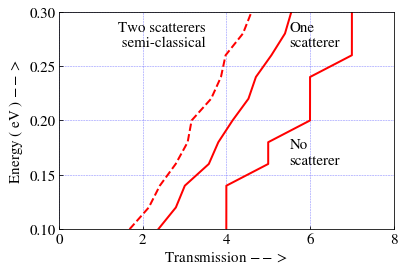

In [202]:
plot(T,E,'r',lw=2)
plot(Tsc,E,'r--',lw=2)
plot(M,E,'r',lw=2)
xlabel(' Transmission $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(0,8)
ylim(0.1,0.3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(1.4,0.268,'Two scatterers \n semi-classical',fontsize=15)
text(5.51,0.268,'One\nscatterer',fontsize=15)
text(5.51,0.16,'No\nscatterer',fontsize=15)
grid(color='b', alpha=0.5, ls='--', lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 11.2.4__ Transmission versus energy calculated for a wire with multiple subbands having no scatterer, one scatterer, and two scatterers. Each scatterer has a maximum potential of 0.25 eV at the
center of the wire. </font>

***

In [203]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [204]:
#1-D elastic coherent and/or phase-breaking, R vs. L, fixed E

#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; IE=(q*q)/(2*pi*hbar); kT=0.025;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q); D=0.05; V=0.01;

#Bias
#Energy grid
E=0.1; zplus=1j*1e-12; f1=1/(1+exp((-V/2)/kT)); f2=1/(1+exp((V/2)/kT));

#Initializing arrays
I1=zeros((20)); I2=zeros((20)); L=zeros((20));

#Current
for k in range(1,21):
    Np=k+1; UB=zeros((Np,1)); U1=V*transpose(linspace(0.5,-0.5,Np));
    T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
    ck=1-((E+zplus-U1[1-1]-UB[1-1])/(2*t0)); ka=cmath.acos(ck);
    sig1[1-1,1-1]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1)));
    ck=1-((E+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2)));
    
    #calculating the Green function, G self-consistently
    G=inv(((E+zplus)*eye(Np))-T-diag(diag(U1+UB))-sig1-sig2); change=1;
    
    while change>1e-4:
        sigp=diag(D*diag(G));
        S=inv(((E+zplus)*eye(Np))-T-diag(diag(U1+UB))-sig1-sig2-sigp);
        change=sum(sum(abs(G-S)))/(sum(sum(abs(G)+abs(S))));
        G=(0.5*G)+(0.5*S);
    
    G=S; A=1j*(G-conj(transpose(G)));
    M=D*(G*conj(G));
    
    #calculating the inscattering functions from the contacts F1,F2
    gam1=1j*(sig1-conj(transpose(sig1))); gam2=1j*(sig2-conj(transpose(sig2)));
    gamp=1j*(sigp-conj(transpose(sigp))); gamma=gam1+gam2+gamp;
    sigin1=f1*gam1; sigin2=f2*gam2;
    #n=(inv(eye(Np)-M))*diag(dot(dot(G,(sigin1+sigin2)),conj(transpose(G))));
    n=dot((inv(eye(Np)-M)),diag(dot(dot(G,(sigin1+sigin2)),conj(transpose(G)))));
    siginp=D*diag(n);
    
    #calculating the correlation function Gn
    Gn=dot(dot(G,(sigin1+sigin2+siginp)),conj(transpose(G)));
    
    #calculating the current
    I1[k-1]=(1/(f1-f2))*real(trace(gam1*Gn)-trace(sigin1*A));
    I2[k-1]=(1/(f1-f2))*real(trace(gam2*Gn)-trace(sigin2*A));
    L[k-1]=k*a*1e10;

L=L/10; #Angstrom to nm

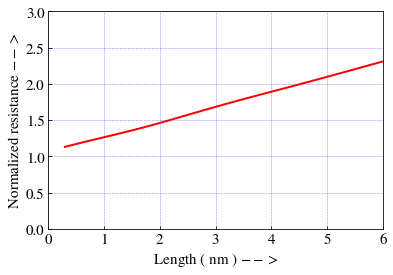

In [205]:
plot(L,1/I2,'r',lw=2)
xlabel(' Length ( nm ) $-->$ ',fontsize=15)
ylabel(' Normalized resistance $-->$ ',fontsize=15)
xlim(0,6)
ylim(0,3)
tick_params(axis='both',which='major',labelsize=15,direction='in')
grid(color='b', alpha=0.5, ls='--', lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 11.2.8__ Normalized resistance (inverse transmission) as a function of length for a one-dimensional wire with phase-breaking scattering only. </font>

***

## <font color = "navy" >11.3 Where is the heat dissipated? </font> <a id="11.3"></a>

In [206]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [207]:
#1-D with inelastic scattering

#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; Ef=0.15; kT=0.025;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q);

#Hamiltonian matrix
Np=40; UB=0*vstack((zeros((10,1)), 0.25*ones((Np-10,1))));
T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));

#Bias
V=0.1; mu1=Ef+(V/2); mu2=Ef-(V/2);
U1=V*transpose((hstack((0.5*ones((1,1)), matrix(linspace(0.5,-0.5,Np-2)), -0.5*ones((1,1)))))); #Applied potential profile
D=1e-1; #Scattering strength

#Energy grid
NE=101; E=linspace(-0.05,0.35,NE); zplus=1j*1e-12; dE=E[1]-E[0];
f1=1/(1+exp((E-mu1)/kT)); f2=1/(1+exp((E-mu2)/kT));

#Initial guess
sigin=0*ones((Np,NE)); sigout=0*ones((Np,NE));

#Iterative solution of transport equation
change=1; it=1; n=zeros((Np,NE)); p=zeros((Np,NE),dtype=complex);

#Initializing arrays
sigin1=zeros((Np,NE),dtype=complex); sigin2=zeros((Np,NE),dtype=complex);
sigout1=zeros((Np,NE),dtype=complex); sigout2=zeros((Np,NE),dtype=complex);

while change>1e-3:
    for k in range(0,NE):
        sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex);
        ck=1-((E[k]+zplus-U1[1-1]-UB[1-1])/(2*t0)); ka=cmath.acos(ck); 
        sig1[1-1,1-1]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1))); 
        ck=1-((E[k]+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck); 
        sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2))); 
        sigin1[:,k]=f1[k]*diag(gam1); sigin2[:,k]=f2[k]*diag(gam2); 
        sigout1[:,k]=(1-f1[k])*diag(gam1); sigout2[:,k]=(1-f2[k])*diag(gam2);
        gamp=sigin[:,k]+sigout[:,k]; 
        G=inv(((E[k]+zplus)*eye(Np))-T-diagflat(U1+UB)-sig1-sig2+(1j*0.5*diag(gamp))); #print(G.shape, np.round(G,4))
        A=diag(1j*(G-conj(transpose(G))));
        n[:,k]=real(diag(G*((f1[k]*gam1)+(f2[k]*gam2)+diag(sigin[:,k]))*conj(transpose(G))));
        p[:,k]=A-n[:,k];
    
    off=0; #less than NE-1, equal to 0 for elastic
    C=exp(-dE*off/kT);
    ne=n[:,list(range(off+1-1,NE))]; ne=hstack((ne, zeros((Np,off))));
    na=n[:,list(range(1-1,NE-off))]; na=hstack((zeros((Np,off)), na));
    pa=p[:,list(range(off+1-1,NE))]; pa=hstack((pa, zeros((Np,off))));
    pe=p[:,list(range(1-1,NE-off))]; pe=hstack((zeros((Np,off)), pe));
    siginnew=(D*ne)+(C*D*na);
    sigoutnew=(D*pe)+(C*D*pa);
    change=sum(sum(abs(siginnew-sigin)));
    change=change+sum(sum(abs(sigoutnew-sigout)));
    sigin=((1-it)*sigin)+(it*siginnew);
    sigout=((1-it)*sigout)+(it*sigoutnew);
    
I1=real((sigout1*n)-(sigin1*p)); I1=I1.sum(axis=0);
I2=real((sigout2*n)-(sigin2*p)); I2=I2.sum(axis=0);
I3=real((sigout*n)-(sigin*p)); I3=I3.sum(axis=0);
I123=(dE/V)*hstack((sum(I1), sum(I2), sum(I3))); #Normalized Conductance
IE=(dE/(V*V))*hstack((sum(E*I1), sum(E*I2), sum(E*I3))); #Normalized Power
kirchoff=hstack((sum(I123), sum(IE))); #checking for conservation of current and energy current

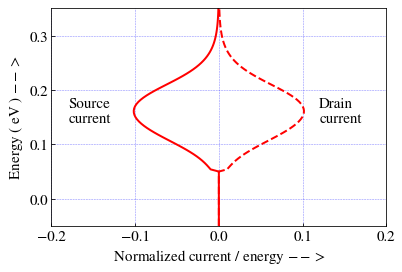

In [208]:
plot(I1,E,'r',lw=2);
plot(I2,E,'r--',lw=2);
xlabel(' Normalized current / energy $-->$ ',fontsize=15)
ylabel(' Energy ( eV ) $-->$ ',fontsize=15)
xlim(-0.2,0.2)
ylim(-0.05,0.35)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(-0.18,0.14,'Source\ncurrent',fontsize=15)
text(0.12,0.14,'Drain\ncurrent',fontsize=15)
grid(color='b', alpha=0.5, ls='--', lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 11.3.1__ Normalized current per unit energy $I_i (E)$ in a one-dimensional wire with phase-breaking elastic scattering.  </font>

***

## <font color = "navy" >11.4 Where is the voltage drop? </font> <a id="11.4"></a>

In [209]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [210]:
#Ballistic self-consistent solution

#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31;
kT=0.0259; zplus=1j*1e-12; eps0=8.854e-12;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q); N=40;
Ef=0.1; Ec=-0.5; Vg=0;
r=5e-9; tox=5e-9; K=2; #Use large value of permittivity K for Laplace limit
U0=q/2/pi/a/K/eps0*log((r+tox)/r);

#Hamiltonian matrix
Np=40;
H0=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1));

#Energy grid
NE=401; E=linspace(-0.5,0.3,NE); dE=E[1]-E[0]; I0=(q**2)/hbar/2/pi;

#Bias
iV=41; V=linspace(0,0.4,iV); n0=0; UL=-Vg*ones((Np,1)); U=UL;

#Initializing arrays
T=zeros((NE),dtype=complex); I1=zeros((NE)); I2=zeros((NE)); I=zeros((iV));

for kk in range(0,iV):
    Vd=V[kk]; mu1=Ef; mu2=Ef-Vd;
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex);
    epsilon=1;
    while epsilon>0.001:
        rho=0;
        for k in range(0,NE):
            f1=1/(1+exp((E[k]-mu1)/kT)); f2=1/(1+exp((E[k]-mu2)/kT));
            cka1=1-(E[k]+zplus-Ec)/2/t0; ka1=cmath.acos(cka1);
            sig1[0,0]=-t0*exp(1j*ka1); gam1=1j*(sig1-conj(transpose(sig1)));
            cka2=1-(E[k]+zplus-Ec+Vd)/2/t0; ka2=cmath.acos(cka2);
            sig2[N-1,N-1]=-t0*exp(1j*ka2); gam2=1j*(sig2-conj(transpose(sig2)));
            G=inv((E[k]+zplus)*eye(N)-H0-diagflat(U)-sig1-sig2); A=1j*(G-conj(transpose(G)));
            sigin1=f1*gam1; sigin2=f2*gam2;
            Gn=dot(dot(G,(sigin1+sigin2)),conj(transpose(G))); rho=rho+dE/2/pi*Gn;
            T[k]=trace(dot(dot(dot(gam1,G),gam2),conj(transpose(G))));
            I1[k]=real(trace(dot(sigin1,A))-trace(dot(gam1,Gn)));
            I2[k]=-real(trace(dot(sigin2,A))-trace(dot(gam2,Gn)));
        n=real(diag(rho)); Unew=transpose(UL)+U0*(n-n0);
        dU=transpose(Unew)-U;
        epsilon=np.max(abs(dU));
        U=U+0.25*dU;
        if Vd==0:
            n0=n; epsilon=0;
    ID1=2*I0*dE*sum(I1); ID2=2*I0*dE*sum(I2); #2 for spin
    I[kk]=ID1;

IonL=I0*Ef;

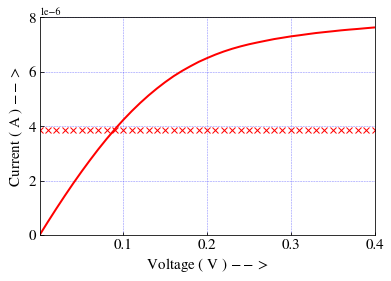

In [211]:
plot(V,I,'r',lw=2);
plot(V,IonL*ones((iV)),'rx',lw=2);
xlabel(' Voltage ( V ) $-->$ ',fontsize=15)
ylabel(' Current ( A ) $-->$ ',fontsize=15)
xlim(0,0.4)
ylim(0,8e-6)
tick_params(axis='both',which='major',labelsize=15,direction='in')
ticklabel_format(style='sci', axis='y', scilimits=(0,0))
xticks(arange(0.1,0.5,0.1))
grid(color='b', alpha=0.5, ls='--', lw=0.5)

<font color = "stone"><font size = "4" > __Fig. 11.4.4__ Current $(I)$ vs. drain voltage $(V_D)$ for a ballistic quantum wire transistor, for different values of the capacitance $C_E$. Also shown (crosses) is the Laplace limit with $U$ = $U_L$. </font>

***

## <font color = "navy" >Exercises </font> <a id="11.E"></a>

In [212]:
%reset -f
%matplotlib inline
from pylab import *
import cmath

In [213]:
#1-D tunneling and/or elastic phase-breaking, R vs. L, fixed E

#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; m=0.25*9.1e-31; IE=(q*q)/(2*pi*hbar); kT=0.025;
zplus=1j*1e-51;

#inputs
a=3e-10; t0=(hbar**2)/(2*m*(a**2)*q);
V=0.001; # Applied voltage
mu=0.1; # Fermi energy
f1=1/(1+exp((-V/2)/kT)); #Fermi function in contact 1 at E=mu
f2=1/(1+exp((V/2)/kT)); #Fermi function in contact 2 at E-mu

#Actual calculation
E=mu;

#Initializing arrays
I11=zeros((22)); I21=zeros((22)); L1=zeros((22));
I12=zeros((22)); I22=zeros((22)); L2=zeros((22));

In [214]:
D=2e-1; #Scattering Strength: 2e-1 (x’s) and 3e-1 (o’s) eV^2

for k in range(4,26):
    Np=k+1; #Length of barrier = (Np-2)*a
    UB=vstack((0,0.5*ones((Np-2,1)),0)); #Barrier height
    U1=V*transpose(linspace(0.5,-0.5,Np)); #Applied potential profile
    T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)); #Tight-binding Hamiltonian
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
    ck=1-((E+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
    sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1))); #Self-energy for contact 1
    ck=1-((E+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2))); #Self-energy for contact 2
    
    #calculating the Green function, G self-consistently
    G=inv(((E+zplus)*eye(Np))-T-diagflat(U1+transpose(UB))-sig1-sig2); change=1;
    
    while change>1e-15:
        sigp=diag(D*diag(G)); #Self-energy due to scattering
        S=inv(((E+zplus)*eye(Np))-T-diagflat(U1+transpose(UB))-sig1-sig2-sigp);
        change=sum(sum(abs(G-S)))/(sum(sum(abs(G)+abs(S))));
        G=(0.5*G)+(0.5*S);
    
    G=S; A=1j*(G-conj(transpose(G))); M=dot(D,(G*conj(G)));
    
    #calculating the inscattering functions from the contacts F1,F2
    gam1=1j*(sig1-conj(transpose(sig1))); gam2=1j*(sig2-conj(transpose(sig2)));
    gamp=1j*(sigp-conj(transpose(sigp))); gamma=gam1+gam2+gamp;
    sigin1=f1*gam1; sigin2=f2*gam2;
    n=dot((inv(eye(Np)-M)),diag(dot(dot(G,(sigin1+sigin2)),conj(transpose(G)))));
    siginp=D*diag(n); #Inflow due to scattering
    
    #calculating the correlation function Gn
    Gn=dot(dot(G,(sigin1+sigin2+siginp)),conj(transpose(G)));
    
    #calculating the current
    I11[k-4]=(1/(f1-f2))*real(trace(dot(gam1,Gn))-trace(dot(sigin1,A)));
    I21[k-4]=(1/(f1-f2))*real(trace(dot(gam2,Gn))-trace(dot(sigin2,A)));
    L1[k-4]=(k-2+1)*a*1e9; #in nanometers

In [215]:
D=3e-1; #Scattering Strength: 2e-1 (x’s) and 3e-1 (o’s) eV^2

for k in range(4,26):
    Np=k+1; #Length of barrier = (Np-2)*a
    UB=vstack((0,0.5*ones((Np-2,1)),0)); #Barrier height
    U1=V*transpose(linspace(0.5,-0.5,Np)); #Applied potential profile
    T=(2*t0*diag(ones((Np))))-(t0*diag(ones((Np-1)),1))-(t0*diag(ones((Np-1)),-1)); #Tight-binding Hamiltonian
    sig1=zeros((Np,Np),dtype=complex); sig2=zeros((Np,Np),dtype=complex); sig3=zeros((Np,Np),dtype=complex);
    ck=1-((E+zplus-U1[0]-UB[0])/(2*t0)); ka=cmath.acos(ck);
    sig1[0,0]=-t0*exp(1j*ka); gam1=1j*(sig1-conj(transpose(sig1))); #Self-energy for contact 1
    ck=1-((E+zplus-U1[Np-1]-UB[Np-1])/(2*t0)); ka=cmath.acos(ck);
    sig2[Np-1,Np-1]=-t0*exp(1j*ka); gam2=1j*(sig2-conj(transpose(sig2))); #Self-energy for contact 2
    
    #calculating the Green function, G self-consistently
    G=inv(((E+zplus)*eye(Np))-T-diagflat(U1+transpose(UB))-sig1-sig2); change=1;
    
    while change>1e-15:
        sigp=diag(D*diag(G)); #Self-energy due to scattering
        S=inv(((E+zplus)*eye(Np))-T-diagflat(U1+transpose(UB))-sig1-sig2-sigp);
        change=sum(sum(abs(G-S)))/(sum(sum(abs(G)+abs(S))));
        G=(0.5*G)+(0.5*S);
    
    G=S; A=1j*(G-conj(transpose(G))); M=dot(D,(G*conj(G)));
    
    #calculating the inscattering functions from the contacts F1,F2
    gam1=1j*(sig1-conj(transpose(sig1))); gam2=1j*(sig2-conj(transpose(sig2)));
    gamp=1j*(sigp-conj(transpose(sigp))); gamma=gam1+gam2+gamp;
    sigin1=f1*gam1; sigin2=f2*gam2;
    n=dot((inv(eye(Np)-M)),diag(dot(dot(G,(sigin1+sigin2)),conj(transpose(G)))));
    siginp=D*diag(n); #Inflow due to scattering
    
    #calculating the correlation function Gn
    Gn=dot(dot(G,(sigin1+sigin2+siginp)),conj(transpose(G)));
    
    #calculating the current
    I12[k-4]=(1/(f1-f2))*real(trace(dot(gam1,Gn))-trace(dot(sigin1,A)));
    I22[k-4]=(1/(f1-f2))*real(trace(dot(gam2,Gn))-trace(dot(sigin2,A)));
    L2[k-4]=(k-2+1)*a*1e9; #in nanometers

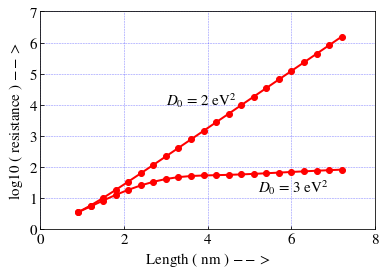

In [216]:
plot(L1,log10(-1/I11),'r',lw=2); #Current at left end
plot(L1,log10(1/I21),'ro',lw=2); #Current at right end
plot(L2,log10(-1/I12),'r',lw=2); #Current at left end
plot(L2,log10(1/I22),'ro',lw=2); #Current at right end
xlabel(' Length ( nm ) $-->$ ',fontsize=15)
ylabel(' log10 ( resistance ) $-->$ ',fontsize=15)
xlim(0,8)
ylim(0,7)
tick_params(axis='both',which='major',labelsize=15,direction='in')
text(3,4,'$D_0$ = 2 eV$^2$',fontsize=15)
text(5.2,1.2,'$D_0$ = 3 eV$^2$',fontsize=15)
grid(color='b', alpha=0.5, ls='--', lw=0.5)

<font color = "stone"><font size = "4" > __Fig. E.11.5.__ Current $(I)$ vs. drain voltage $(V_D)$ for a ballistic quantum wire transistor, for different values of the capacitance $C_E$. Also shown (crosses) is the Laplace limit with $U$ = $U_L$. </font>

***

In [217]:
%reset -f
%matplotlib inline
from pylab import *

In [218]:
#0-D with inelastic scattering

#Constants (all MKS, except energy which is in eV)
hbar=1.06e-34; q=1.6e-19; I0=q*q/(2*pi*hbar);

#Parameters
H0=5; Ef=0; kT=0.0025; dE=0.0005; zplus=1j*1e-12; gamma=0.1;
D0=0; Dnu=0*matrix([0.5, 0.7]); Nph=size(Dnu,1); Dnu=array([Dnu[0,0], Dnu[0,1]]);
hnu=array([100, 550]); #Multiply by dE for actual hnu
Nhnu=1/((exp(dE*hnu/kT))-1);

#Bias
NV=203; VV=linspace(-0.51,0.5,NV); dV=VV[1]-VV[0];

#Initializing arrays
II=zeros((NV));

for iV in range(0,NV):
    V=VV[iV]; mu1=Ef; mu2=Ef-V; U1=(-0.5)*V;
    
    #Energy grid
    E=array(arange(mu2-(10*kT)-(10*dE),mu1+(10*kT)+(10*dE)+dE,dE));
    
    if V<0:
        E=array(arange(mu1-(10*kT)-(10*dE),mu2+(10*kT)+(10*dE)+dE,dE));
    
    NE=size(E,0);
    f1=1/(1+exp((E-mu1)/kT)); f2=1/(1+exp((E-mu2)/kT));
    
    #Initial guess
    n=zeros((NE)); p=zeros((NE));
    sigin1=zeros((NE)); sigout1=zeros((NE));
    sigin2=zeros((NE)); sigout2=zeros((NE));
    sigin=0*ones((NE)); sigout=0*ones((NE));
    
    #Iterative solution of transport equation
    change=1; it=1;
    
    while change>1e-3:
        
        for k in range(0,NE):
            sig1=-1j*gamma/2; gam1=1j*(sig1-conj(transpose(sig1)));
            sig2=-1j*gamma/2; gam2=1j*(sig2-conj(transpose(sig2)));
            sigin1[k]=f1[k]*gam1; sigin2[k]=f2[k]*gam2;
            sigout1[k]=(1-f1[k])*gam1; sigout2[k]=(1-f2[k])*gam2;
            gamp=sigin[k]+sigout[k]; 
            G=inv(matrix((E[k]+zplus)-H0-U1-sig1-sig2+(1j*0.5*gamp))); G=G[0,0];
            A=1j*(G-conj(transpose(G)));
            n[k]=real(G*((f1[k]*gam1)+(f2[k]*gam2)+sigin[k])*conj(transpose(G)));
            p[k]=A-n[k];
        
        siginnew=D0*n; sigoutnew=D0*p;
        
        for iph in range(0,Nph):
            inu=hnu[iph];
            if inu<NE:
                ne=n[list(range(inu+1-1,NE))]; ne=hstack((ne, zeros((inu))));
                na=n[list(range(1-1,NE-inu))]; na=hstack((zeros((inu)), na));
                pe=p[list(range(inu+1-1,NE))]; pe=hstack((pe, zeros((inu))));
                pa=p[list(range(1-1,NE-inu))]; pa=hstack((zeros((inu)), pa));
                siginnew=siginnew+((Nhnu[iph]+1)*Dnu[iph]*ne)+(Nhnu[iph]*Dnu[iph]*na);
                sigoutnew=sigoutnew+(Nhnu[iph]*Dnu[iph]*pe)+((Nhnu[iph]+1)*Dnu[iph]*pa);
        
        change=sum(sum(abs(siginnew-sigin)));
        change=change+sum(sum(abs(sigoutnew-sigout)));
        sigin=((1-it)*sigin)+(it*siginnew);
        sigout=((1-it)*sigout)+(it*sigoutnew);
    
    I1=real((sigout1*n)-(sigin1*p)); I1=sum(I1);
    I2=real((sigout2*n)-(sigin2*p)); I2=sum(I2);
    I3=real((sigout*n)-(sigin*p)); I3=sum(I3);
    I123=dE*matrix([sum(I1), sum(I2), sum(I3)]); #Normalized Conductance
    II[iV]=sum(I2)*dE*I0;

G1=diff(II)/dV; VG=VV[list(range(1,NV))];
IETS=diff(G1)/dV; VETS=VV[list(range(2,NV))];

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part


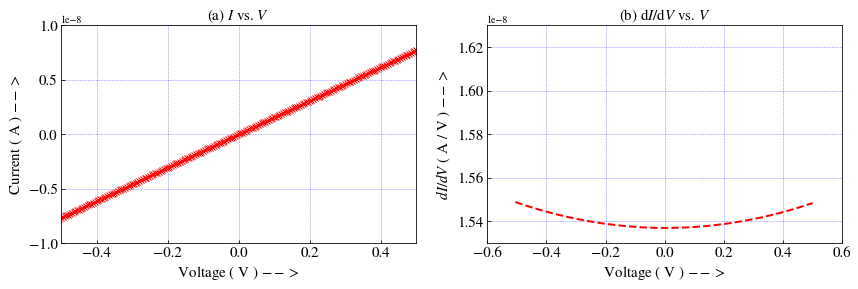

In [219]:
figure(figsize=(14,4))
subplot(1,2,1)
plot(VV,II,'rx',lw=2)
xlabel(' Voltage ( V ) $-->$ ',fontsize=15)
ylabel(' Current ( A ) $-->$ ',fontsize=15)
xlim(-0.5,0.5)
ylim(-1e-8,1e-8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('(a) $I$ vs. $V$',fontsize=15)
grid(color='b', alpha=0.5, ls='--', lw=0.5)

subplot(1,2,2)
plot(VG,G1,'r--',lw=2)
xlabel(' Voltage ( V ) $-->$ ',fontsize=15)
ylabel(' $dI/dV$ ( A / V ) $-->$ ',fontsize=15)
xlim(-0.6,0.6)
ylim(1.53e-8,1.63e-8)
tick_params(axis='both',which='major',labelsize=15,direction='in')
title('(b) d$I$/d$V$ vs. $V$',fontsize=15)
grid(color='b', alpha=0.5, ls='--', lw=0.5)

<font color = "stone"><font size = "4" > __Fig. E.11.6.__ (a) Current ($I$), (b) conductance (d$I$/d$V$). </font>

***

## _References_ </u><a id="references"></a>

<font color = "stone"><font size = "3" > 
- Datta, S. (2005). Quantum Transport: Atom to Transistor. Cambridge: Cambridge University Press. doi:10.1017/CBO9781139164313 
- Datta, S. “Fundamentals of Nanoelectronics: Basic Concepts”. MOOC offered by the Purdue University. <br>
[Online] https://courses.edx.org/courses/PurdueX/nano520/3T2015/course/
- Datta, S. “Fundamentals of Nanoelectronics, Part B: Quantum Transport”. MOOC offered by the Purdue University. <br> 
[Online] https://courses.edx.org/courses/course-v1:PurdueX+nano521x+2015_T3/course/</font>